<h1 align=Center style="color:blue">  Credit Risk Modeling Project </h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### Load Data

In [2]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
df_customers.isnull().sum()

cust_id                      0
age                          0
gender                       0
marital_status               0
employment_status            0
income                       0
number_of_dependants         0
residence_type              62
years_at_current_address     0
city                         0
state                        0
zipcode                      0
dtype: int64

In [6]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [7]:
df_bureau.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [8]:
df = pd.merge(df_customers, df_loans, on="cust_id")
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [9]:
df = pd.merge(df, df_bureau, on = "cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df["default"] = df["default"].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

default is a target variable where class imbalance exists. We will address this later.

### Train, test, split 

We perform Train, Test and Split before doing EDA to prevent Data leakage. We don't want test set ( which is part of entire data-set) to influence EDA or any decision on feature engineering

In [12]:
X = df.drop(columns="default")
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis = "columns")
df_test = pd.concat([X_test, y_test], axis = "columns")

df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0


<h3 align="center" style="color:blue">Data Cleaning</h3>

In [13]:
df_train.shape

(37500, 33)

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
df_train.residence_type.value_counts(dropna=False)

residence_type
Owned       21114
Mortgage     8901
Rented       7437
NaN            48
Name: count, dtype: int64

In [17]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [18]:
df_train["residence_type"] = df_train["residence_type"].fillna(mode_residence)

In [19]:
df_train.residence_type.value_counts(dropna=False)

residence_type
Owned       21162
Mortgage     8901
Rented       7437
Name: count, dtype: int64

In [20]:
df_test["residence_type"] = df_test["residence_type"].fillna(mode_residence)

In [21]:
df_test.residence_type.value_counts(dropna=False)

residence_type
Owned       7138
Mortgage    2918
Rented      2444
Name: count, dtype: int64

In [22]:
df_train.duplicated().sum(),  df_test.duplicated().sum(),

(np.int64(0), np.int64(0))

In [23]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.56,2636054.83,1.94,15.99,418768.57,4706706.56,4002796.64,80724.11,720503.40,3202237.31,...,1336077.19,987467.44,2.50,1.00,76.00,4.89,26.94,5.00,43.33,0.09
std,9.85,2624140.92,1.54,8.94,168831.82,6288692.94,5400902.41,120830.65,972162.43,4320721.92,...,1213733.93,1045108.58,1.12,0.82,43.71,5.86,32.93,2.02,29.36,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1136000.00,959000.00,19180.00,172620.00,767200.00,...,423931.00,286189.50,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,40.00,1884000.00,2.00,16.00,400001.00,2651000.00,2234000.00,44700.00,402120.00,1787200.00,...,1000881.50,666825.00,2.00,1.00,71.00,3.00,14.00,5.00,39.00,0.00
75%,46.00,3332000.00,3.00,24.00,560001.00,5159000.00,4597250.00,92000.00,827505.00,3677800.00,...,1789091.75,1236740.50,3.00,2.00,107.00,9.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47667000.00,5698029.90,8580060.00,38133600.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [24]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [25]:
df_train.select_dtypes(include=["int64","float64"]).columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [26]:
df_train.select_dtypes(include=["object","category"]).columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [27]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                        'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                        'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 
                        'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                        'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
columns_categorical = ['gender', 'marital_status', 'employment_status','residence_type', 'city', 
                        'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


In [28]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### box plot to visualize outliers

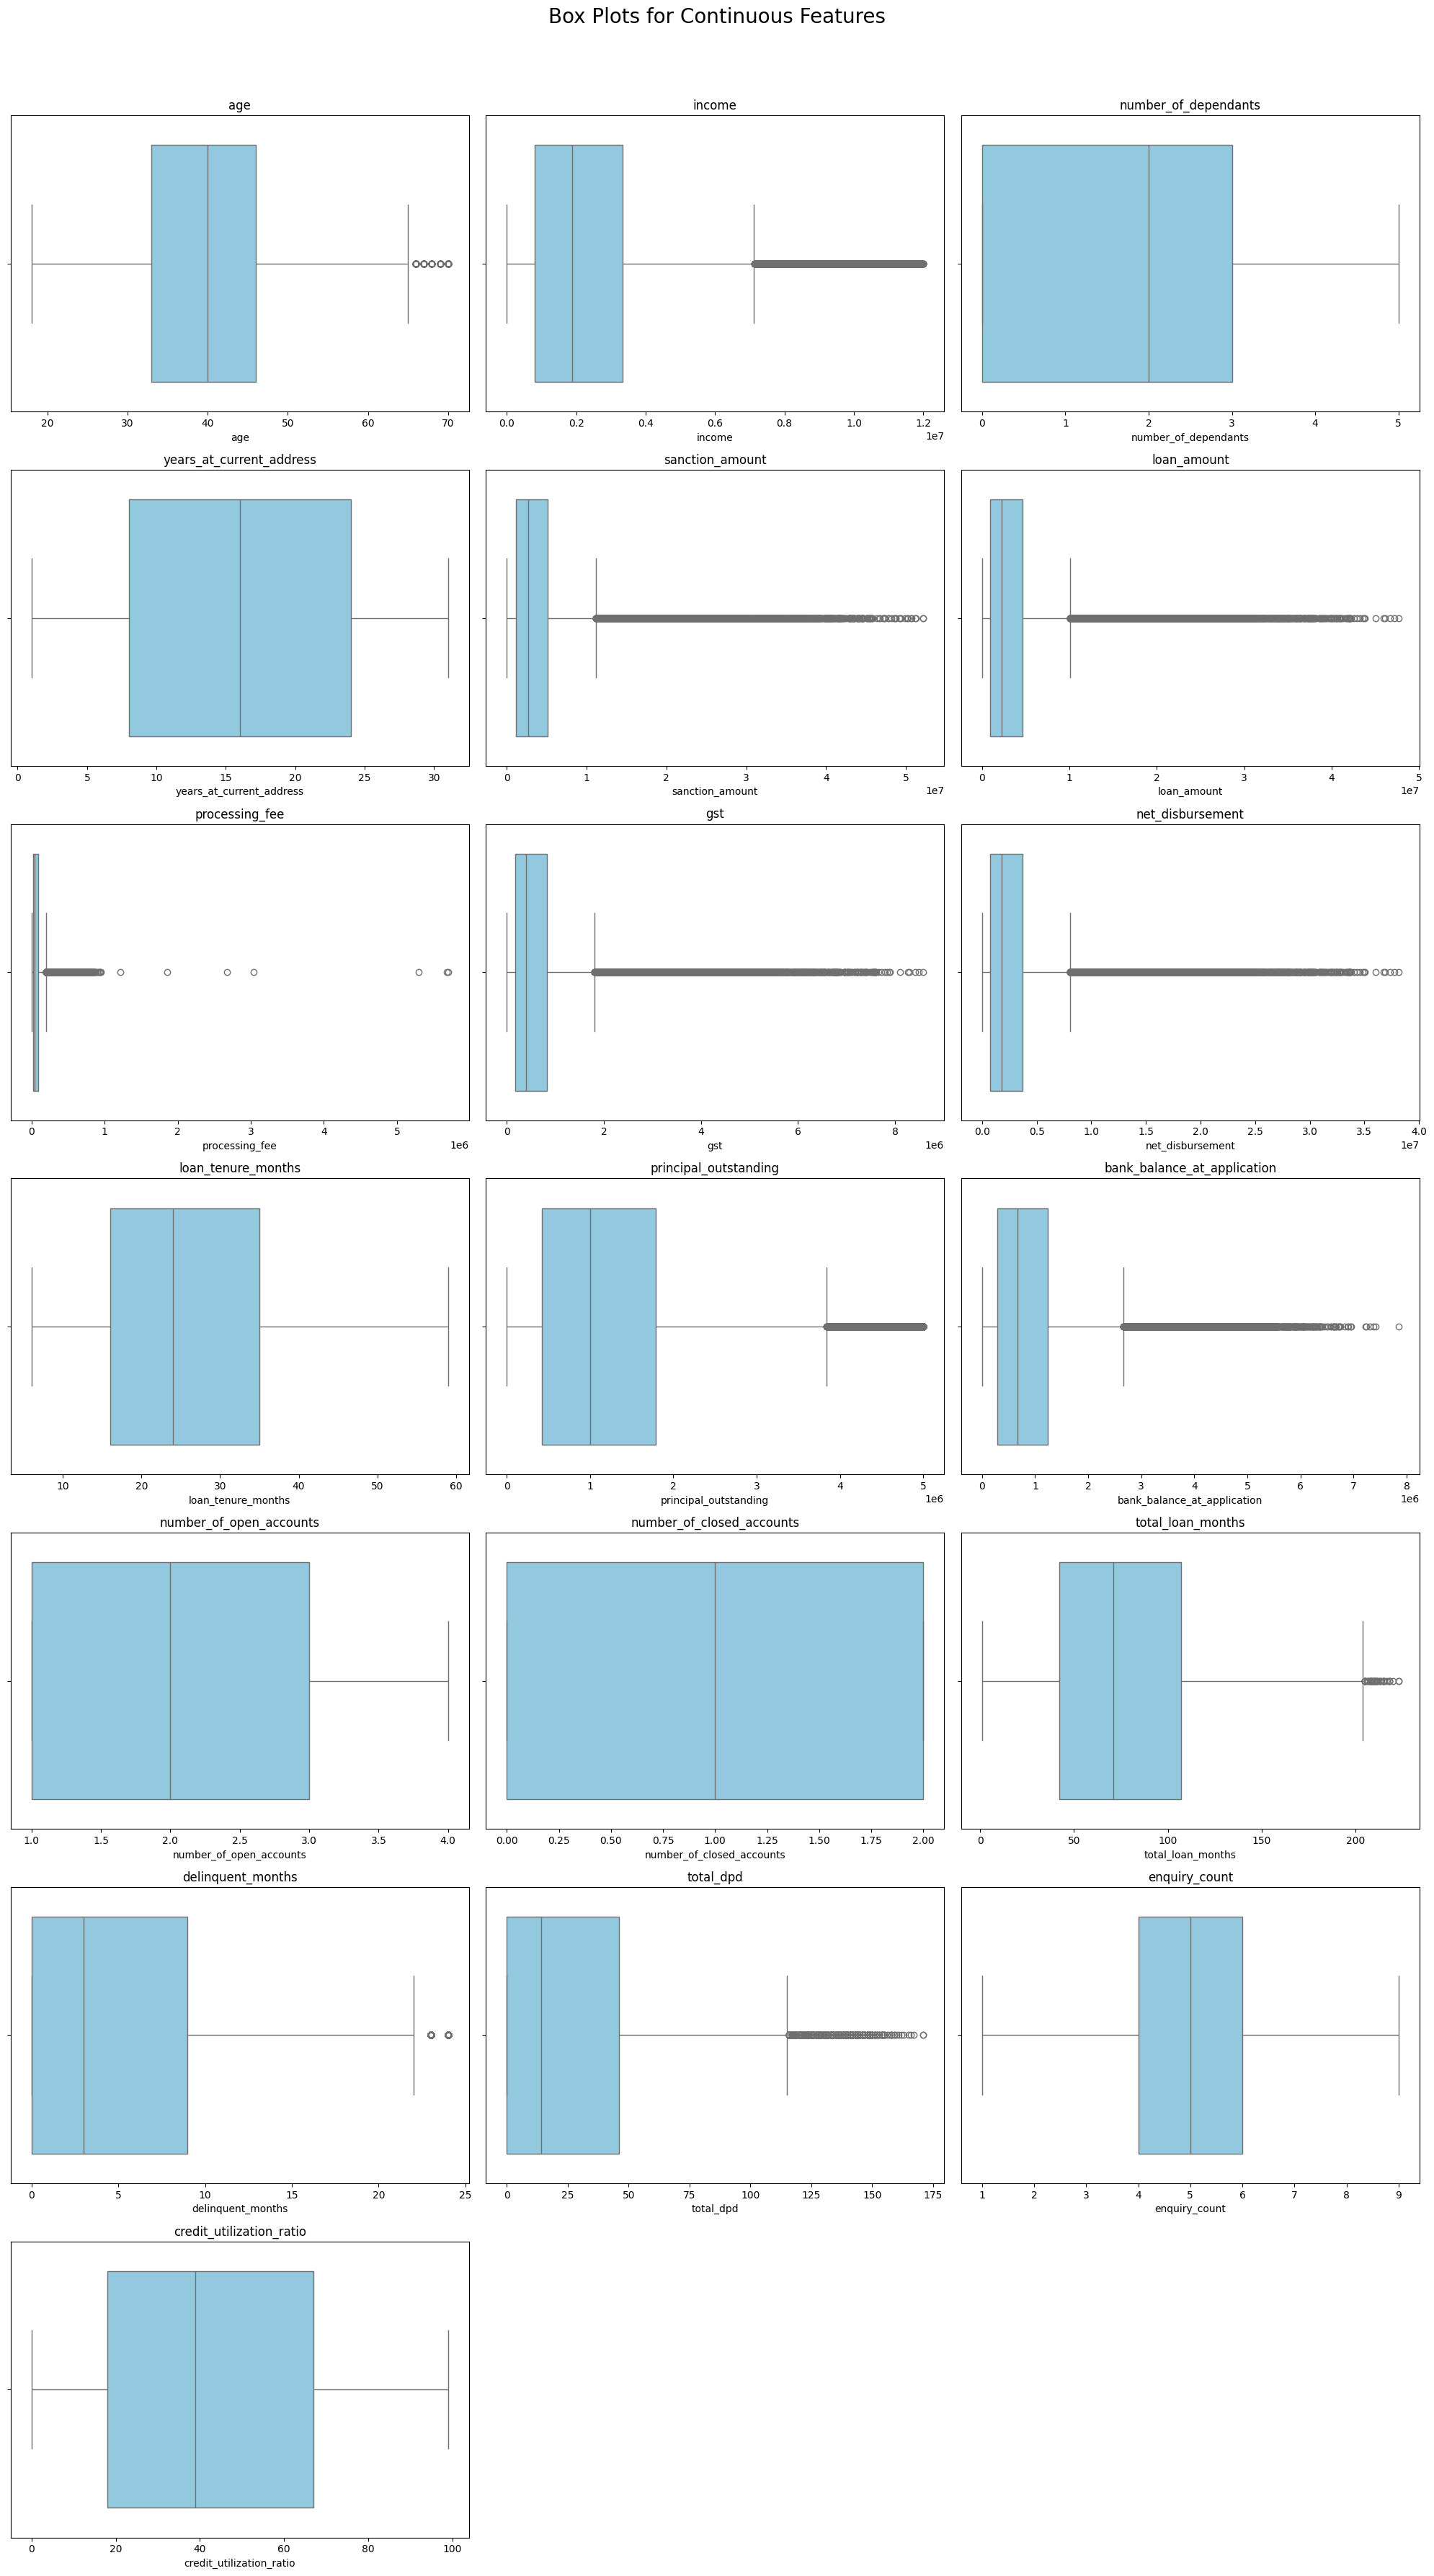

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous columns
columns_continuous = [
    'age', 'income', 'number_of_dependants', 'years_at_current_address', 
    'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
    'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
    'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 
    'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio'
]

# Set up the figure
plt.figure(figsize=(20, 35))
plt.suptitle("Box Plots for Continuous Features", fontsize=20, y=1.02)

# Create subplots for each column
for i, col in enumerate(columns_continuous, 1):
    plt.subplot(7, 3, i)  # Adjust grid size based on number of columns
    sns.boxplot(data=df_train, x=col, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


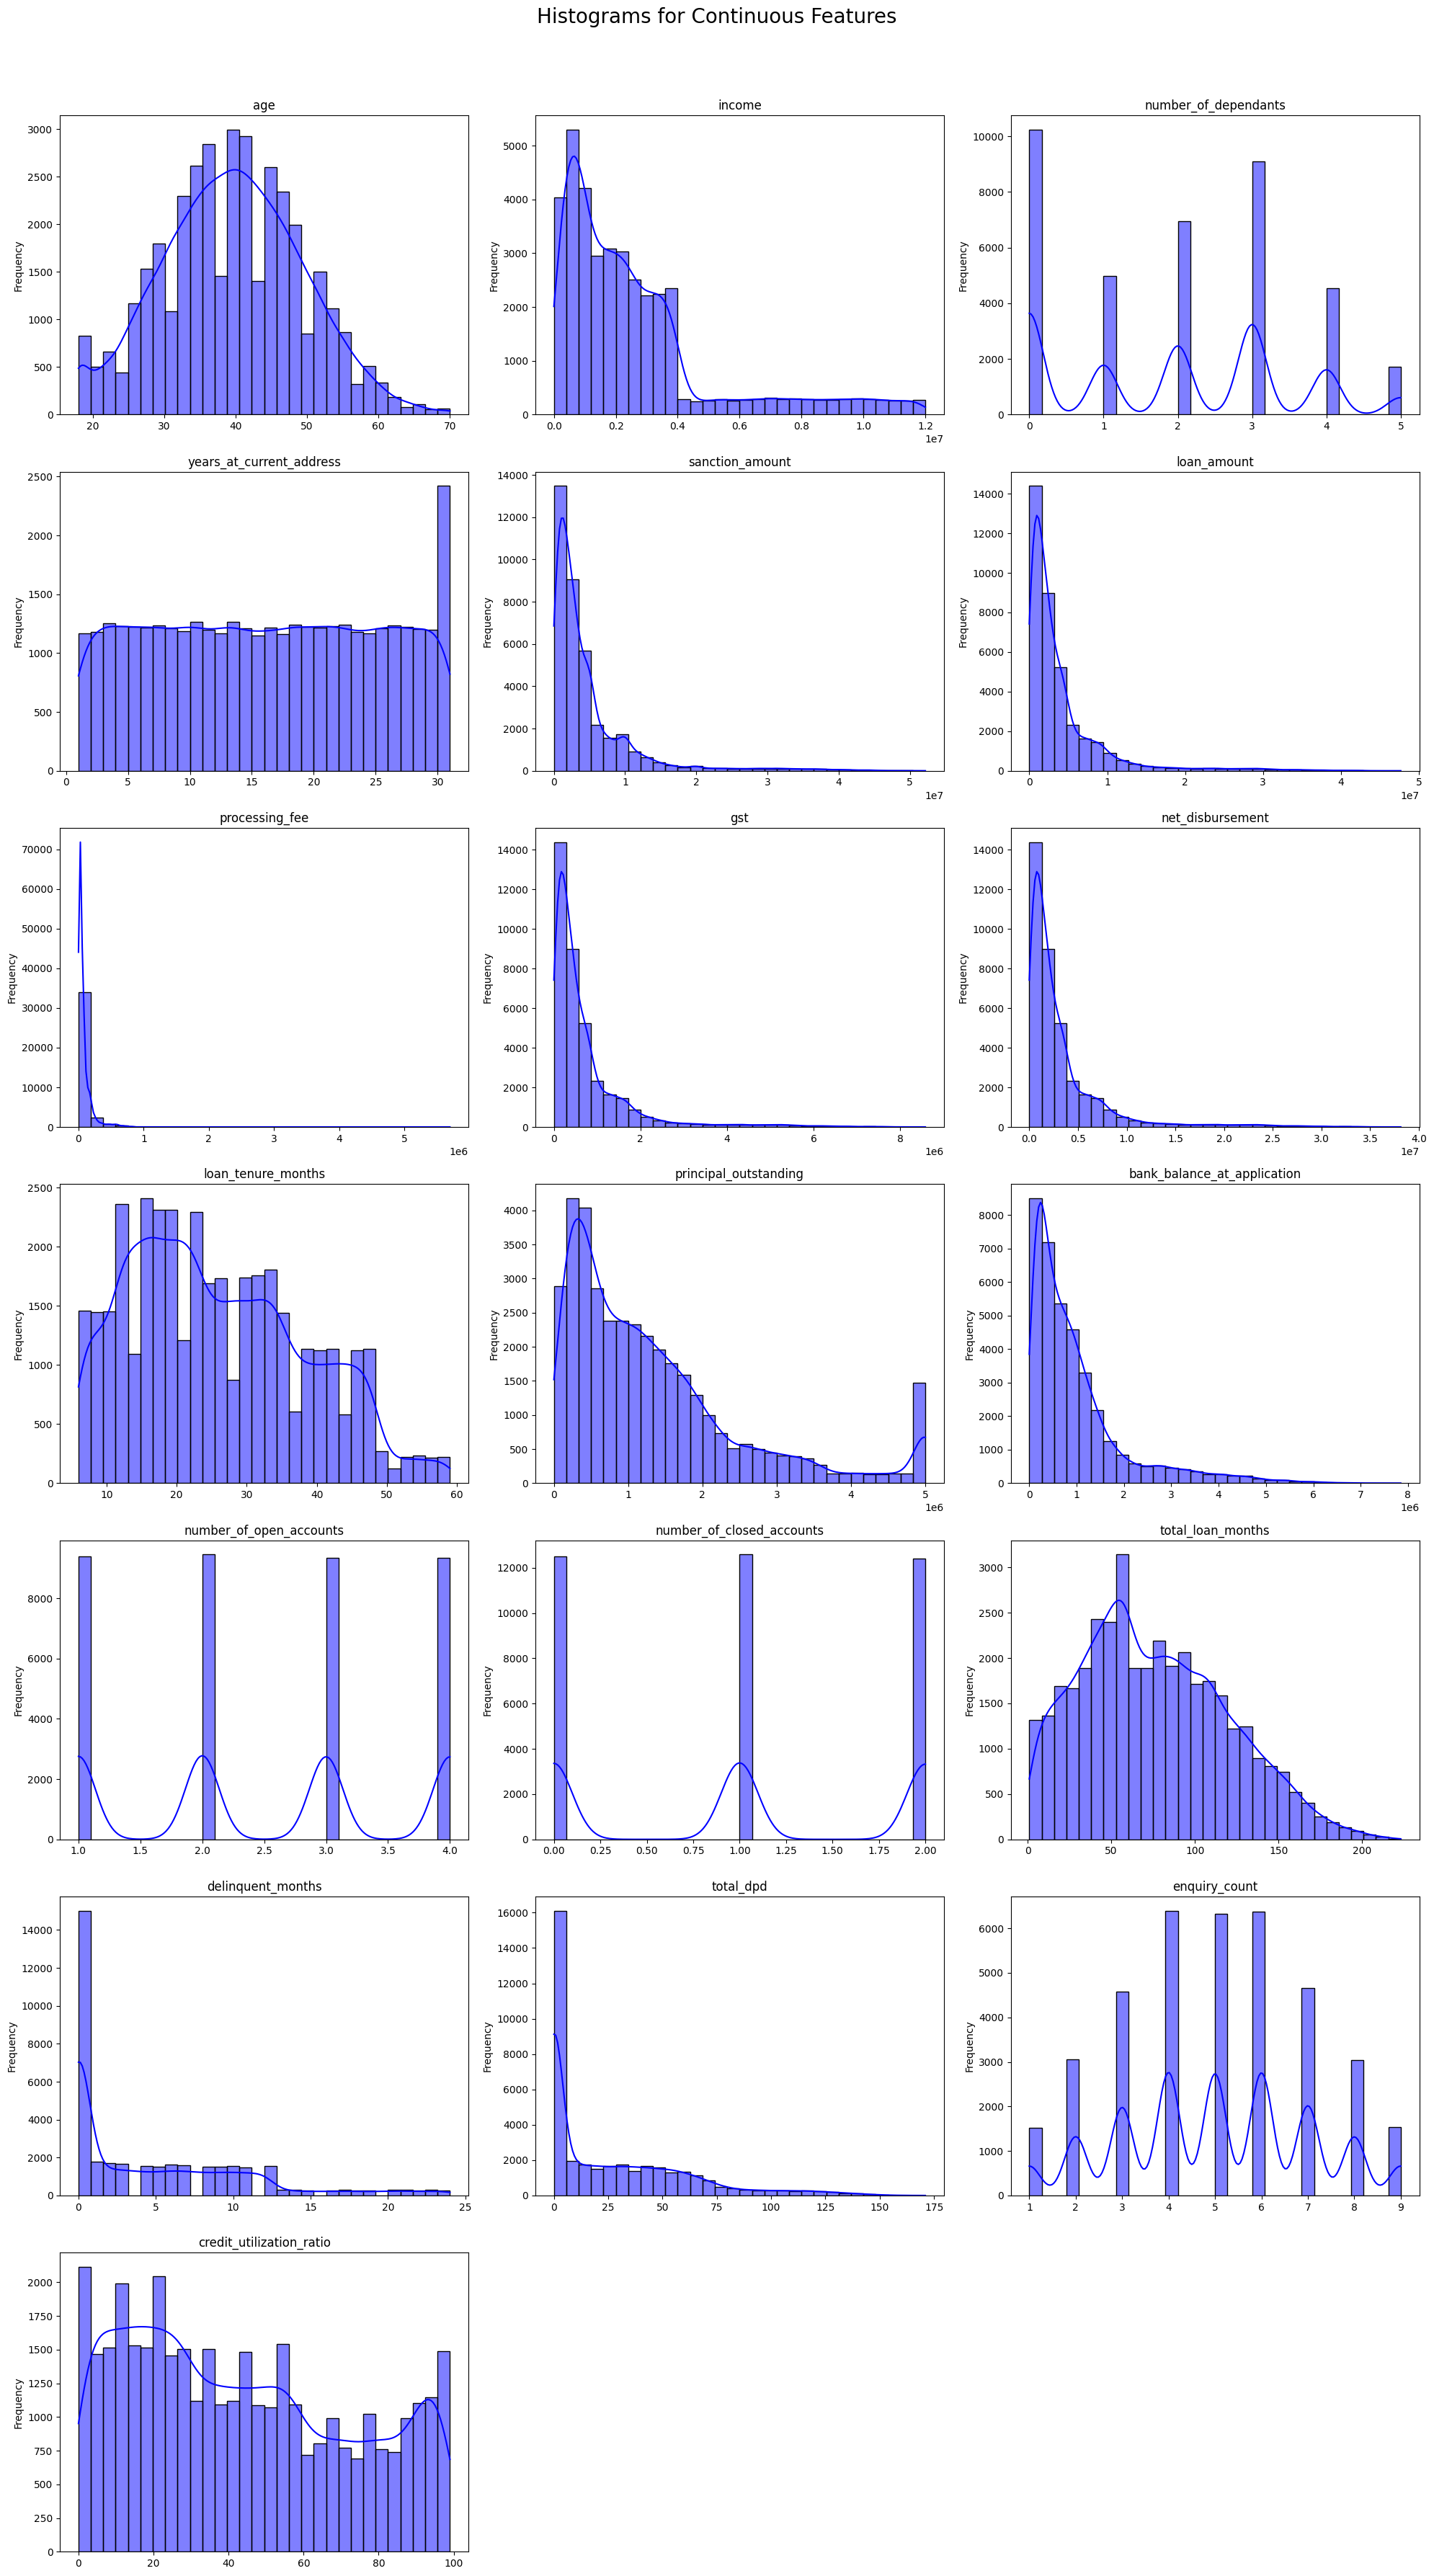

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous columns
columns_continuous = [
    'age', 'income', 'number_of_dependants', 'years_at_current_address', 
    'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
    'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application',
    'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 
    'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio'
]

# Set up the figure size and layout
plt.figure(figsize=(20, 35))
plt.suptitle("Histograms for Continuous Features", fontsize=20, y=1.02)

# Loop through each continuous feature and plot
for i, col in enumerate(columns_continuous, 1):
    plt.subplot(7, 3, i)  # Adjust grid size based on the number of columns
    sns.histplot(data=df_train, x=col, kde=True, color='blue', bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


### Outlier Removal: Processing Fee

In [31]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [32]:
t_df = df_train["processing_fee"]/df_train["loan_amount"]

In [33]:
t_df.value_counts(dropna=False)

0.02    37487
NaN         6
1.20        1
1.46        1
1.07        1
1.49        1
1.23        1
1.26        1
1.16        1
Name: count, dtype: int64

In [34]:
df_train[df_train["processing_fee"]/df_train["loan_amount"] > 0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
28174,C28175,36,F,Single,Self-Employed,1123000,1,Rented,31,Hyderabad,...,2022-05-18,2022-06-05,3,0,111,8,41,3,62,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0


In [35]:
df_train_1 = df_train[df_train["processing_fee"]/df_train["loan_amount"] <= 0.03].copy()

In [36]:
df_train_1.shape, df_train.shape

((37487, 33), (37500, 33))

Apply same step for test data-set

In [37]:
df_test_1 = df_test[df_test["processing_fee"]/df_test["loan_amount"] <= 0.03].copy()

In [38]:
df_test_1.shape, df_test.shape

((12498, 33), (12500, 33))

In [39]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_test_1[df_test_1["gst"]/df_test_1["loan_amount"] > 0.20].shape

(0, 33)

In [40]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_test_1[df_test_1["net_disbursement"] > df_test_1["loan_amount"]].shape

(0, 33)

No rows found that breaks rule1 and rule2 

In [41]:
df_test_1[df_test_1["principal_outstanding"] > df_test_1["loan_amount"]].shape

(0, 33)

### Analyze Categorical columns

In [42]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [43]:
df_train_1.gender.value_counts()

gender
M    22563
F    14924
Name: count, dtype: int64

In [44]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Fix errors in loan_purpose column

In [45]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace('Personaal', 'Personal') 
df_test_1["loan_purpose"] = df_test_1["loan_purpose"].replace('Personaal', 'Personal') 

In [46]:
df_train_1.loan_purpose.value_counts(dropna=False)

loan_purpose
Personal     13153
Home         11271
Auto          7437
Education     5626
Name: count, dtype: int64

<h3 align="center" style="color:blue"> EDA (Exploratory Data Analysis) </h3>

### Bivariate Analysis

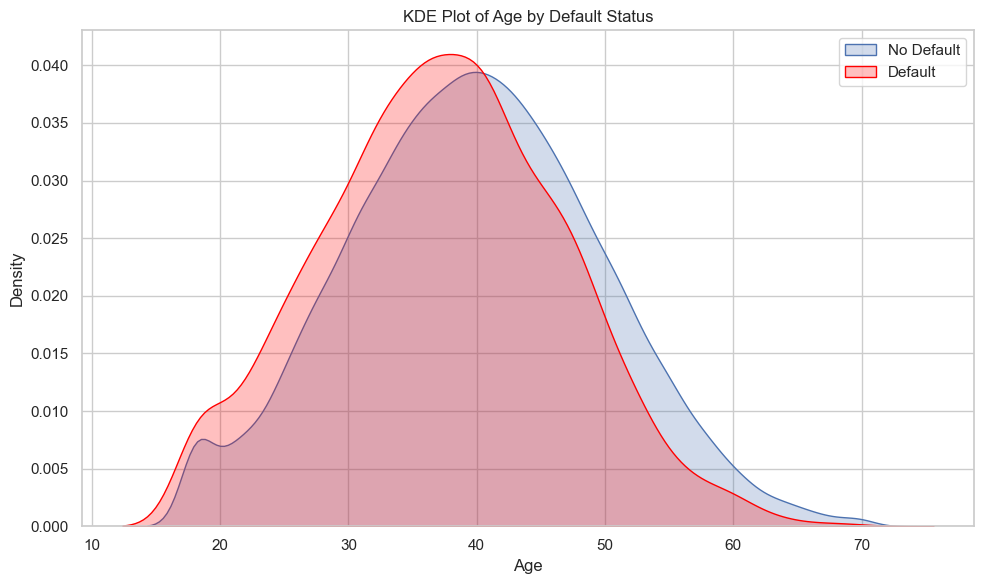

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# KDE Plot of 'age' for default vs non-default
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x='age', label='No Default', fill=True)
sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x='age', label='Default', fill=True, color='red')

plt.title('KDE Plot of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


Observation-1 : Defaulters age is less than Non-defaulters

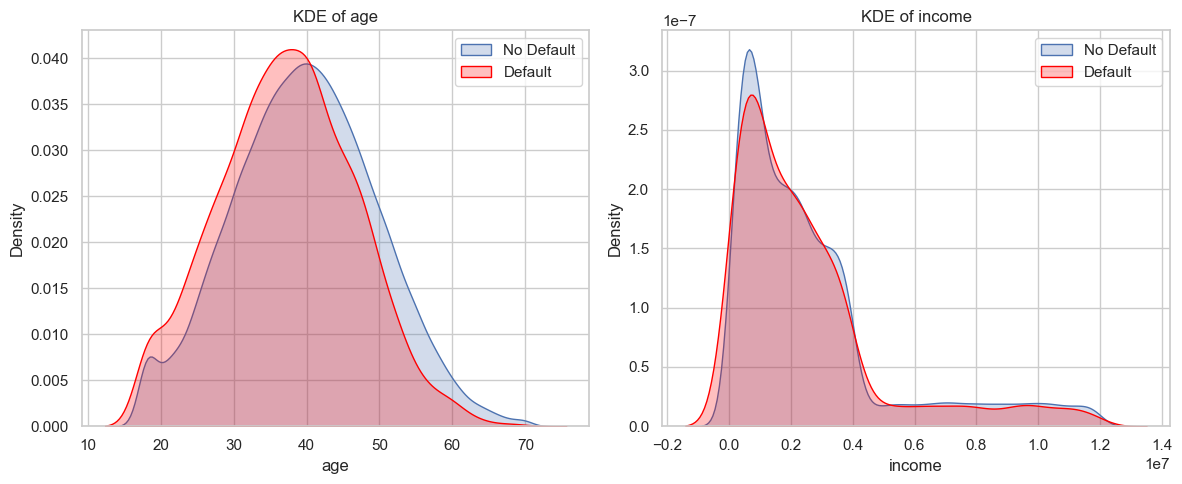

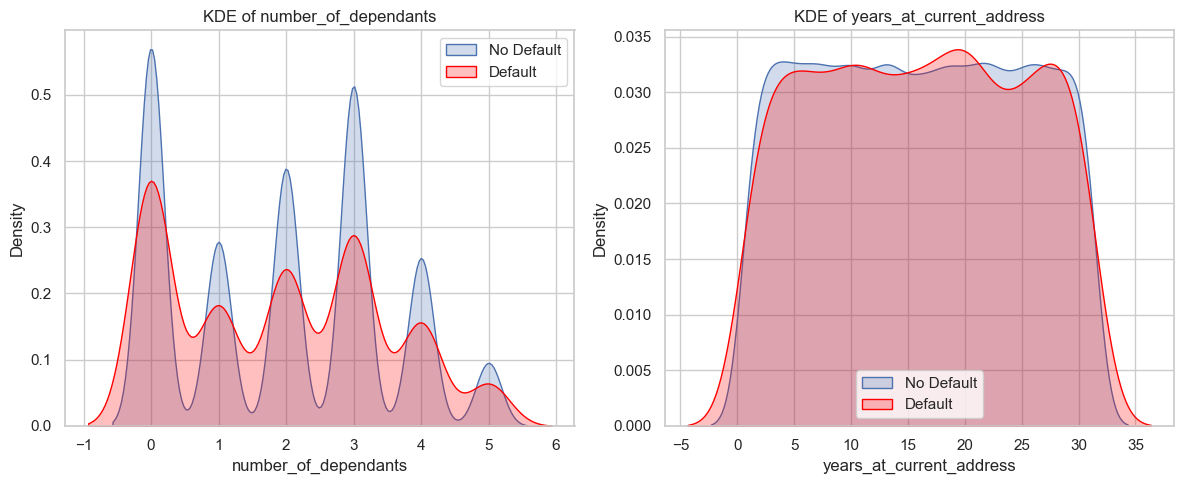

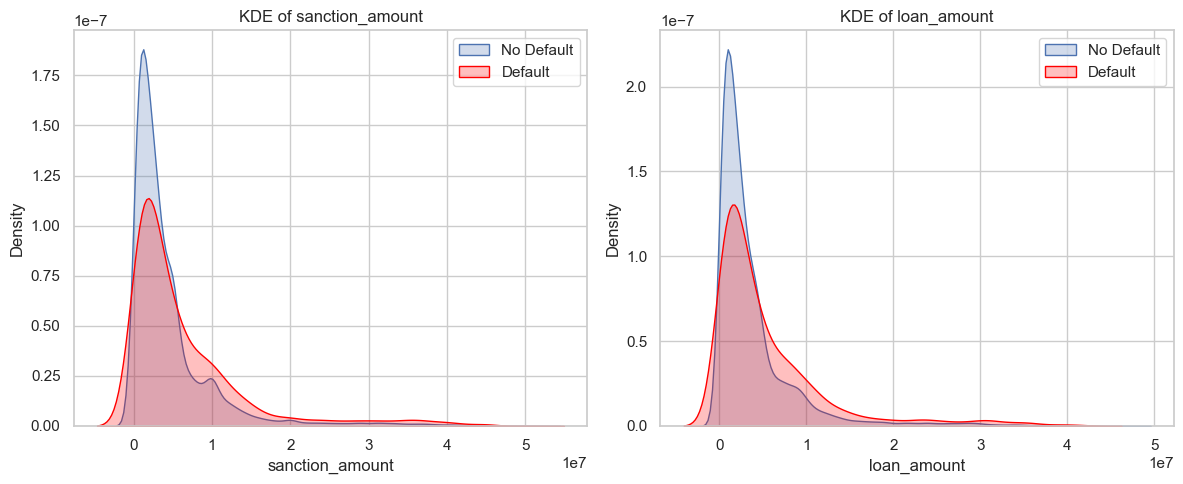

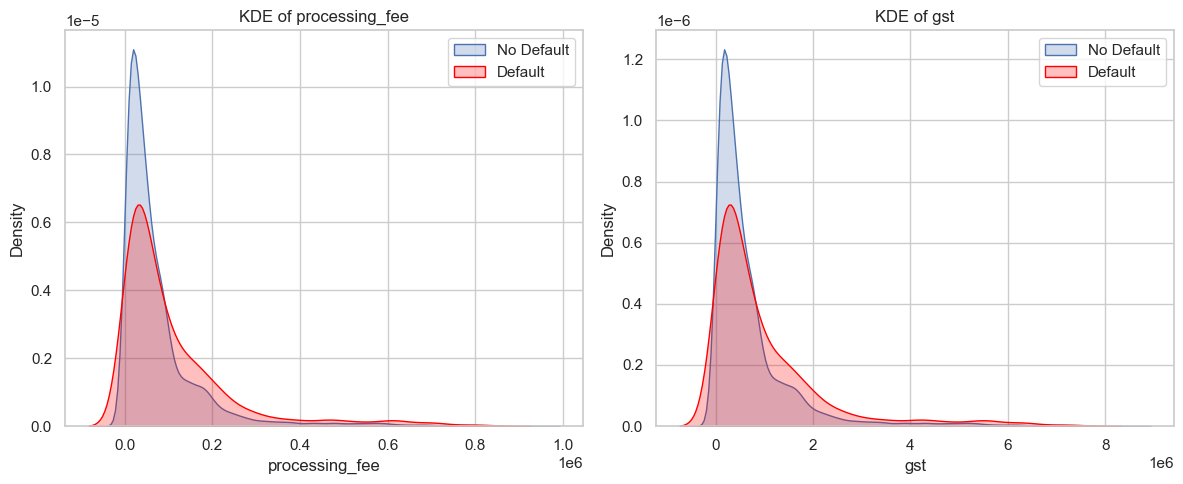

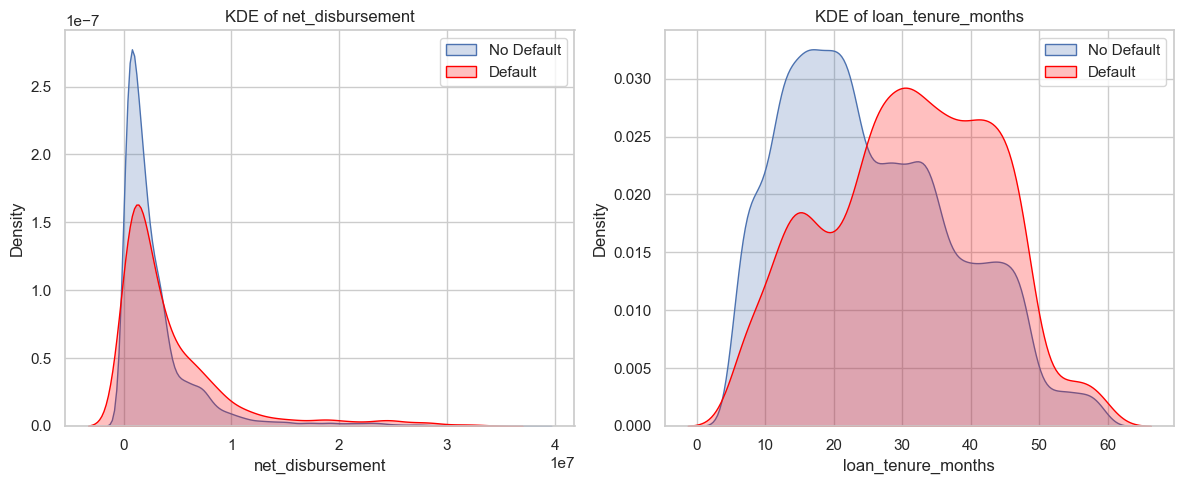

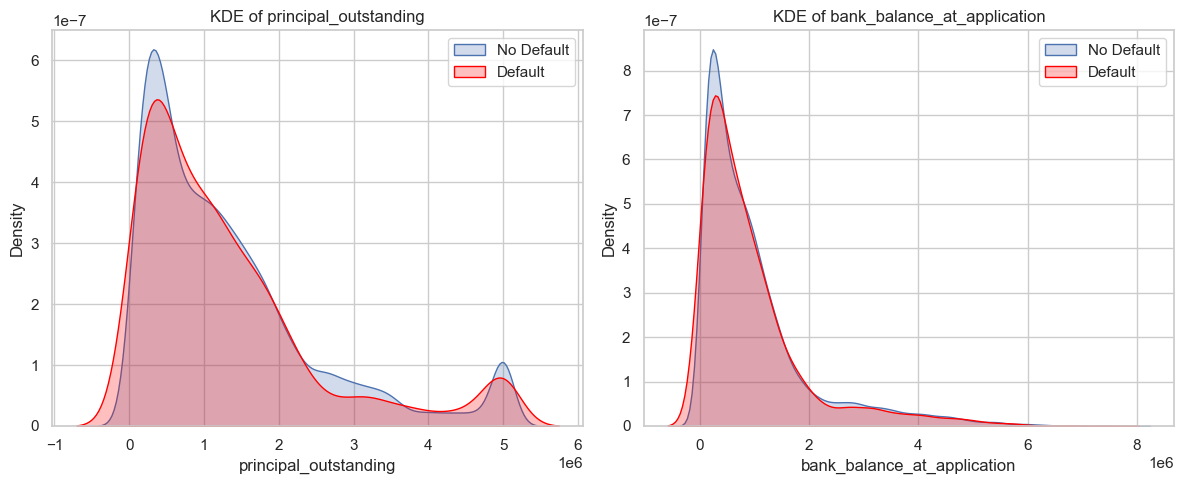

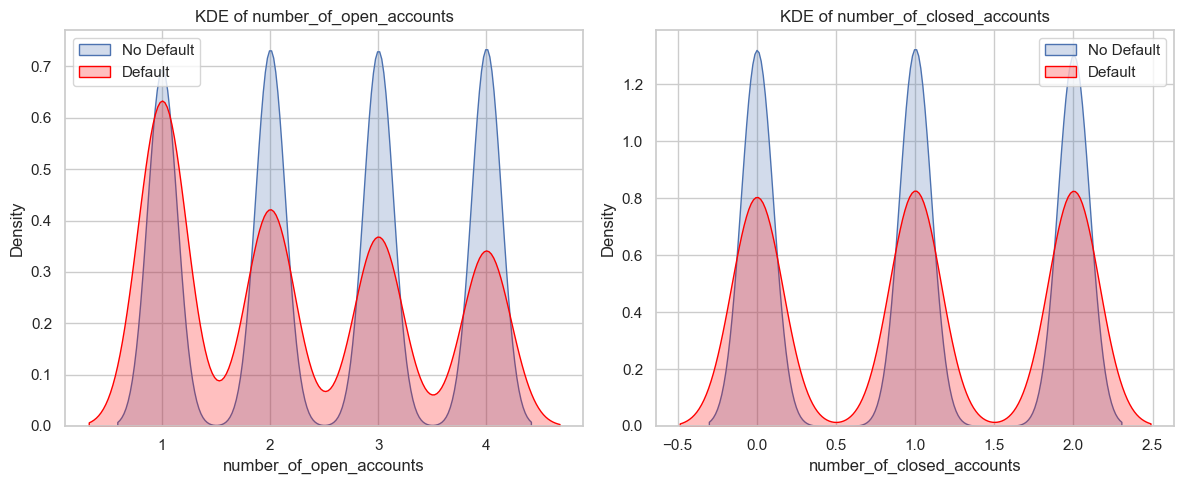

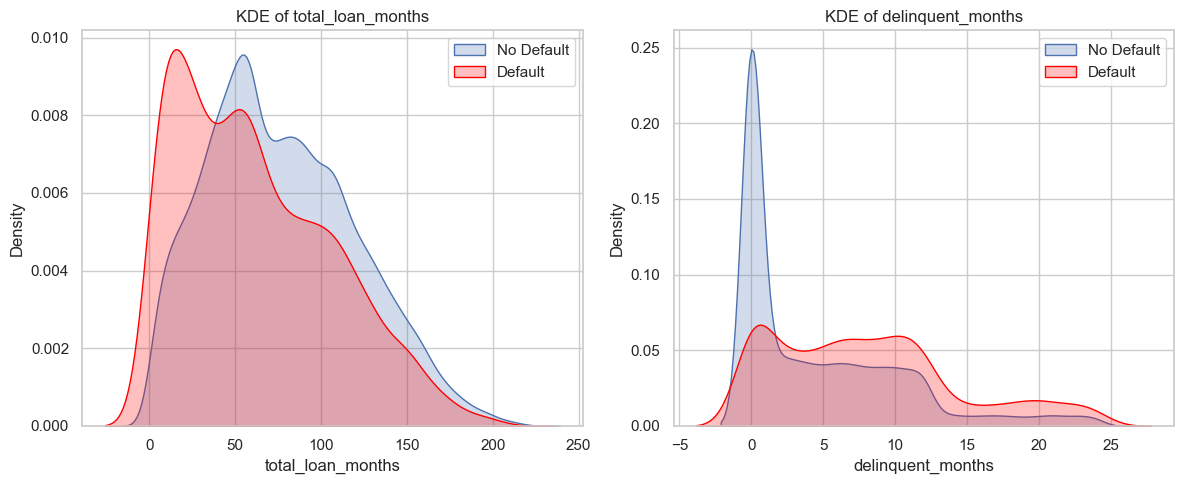

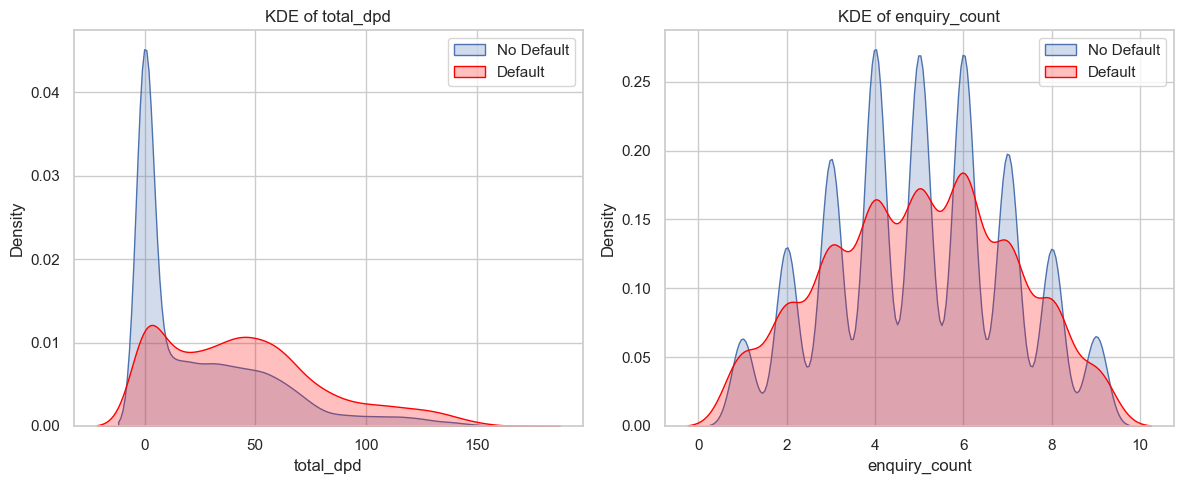

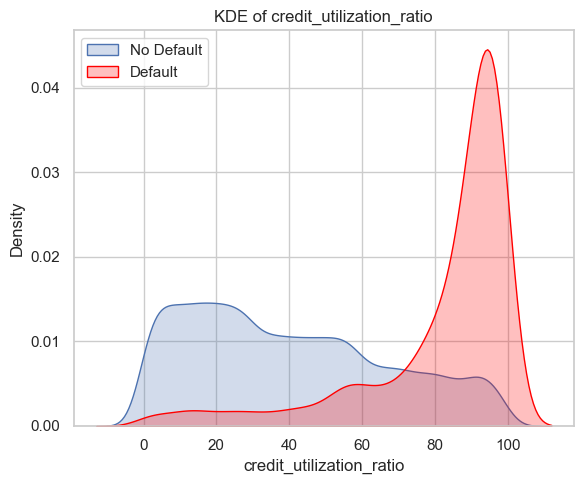

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Number of plots per row
plots_per_fig = 2
total_plots = len(columns_continuous)

# Loop through the columns in chunks of 3
for i in range(0, total_plots, plots_per_fig):
    cols_subset = columns_continuous[i:i+plots_per_fig]
    
    # Create subplots (1 row, up to 3 columns)
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6 * len(cols_subset), 5))
    
    # If only one subplot (e.g. last chunk), make axes iterable
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.kdeplot(data=df_train_1[df_train_1['default'] == 0], x=col, label='No Default', fill=True, ax=ax)
        sns.kdeplot(data=df_train_1[df_train_1['default'] == 1], x=col, label='Default', fill=True, color='red', ax=ax)
        
        ax.set_title(f'KDE of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()


Insights : 
(1) Following columns 
    (a) Columns Age, (b)loan_tenure_months, (c)total_loan_months, (d)delinquent_months, 
    (e) total_dpd, (f) credit_utilization_ratio values indicate high liklyhood of becoming a default.
(2) In remaining columns, the distribution do not give any obvious insights.
(3) loan_amount and income did not give any signs of being strong predictor. Need to explore by looking at loan_amount income ratio.

### additional EDA 

Loan to Income (LTI) ratio

In [49]:
df_train_1[["loan_amount","income"]].head(3)

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000


In [50]:
df_train_1["loan_to_income"] = round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_train_1.loan_to_income.describe()

count   37487.00
mean        1.55
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

In [51]:
df_test_1["loan_to_income"] = round(df_test_1["loan_amount"]/df_test_1["income"],2)
df_test_1.loan_to_income.describe()

count   12498.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.17
75%         2.45
max         4.59
Name: loan_to_income, dtype: float64

In [52]:
df_train_1[["loan_to_income","default","loan_amount","income"]].groupby(["default"]).sum()

,loan_to_income,loan_amount,income
default,,,
0,51253.27,132226645000,90898536000
1,7034.89,17858598000,7921661000


In [53]:
df_test_1["loan_to_income"] = round(df_test_1["loan_amount"]/df_test_1["income"],2)
df_test_1.loan_to_income.describe()

count   12498.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.17
75%         2.45
max         4.59
Name: loan_to_income, dtype: float64

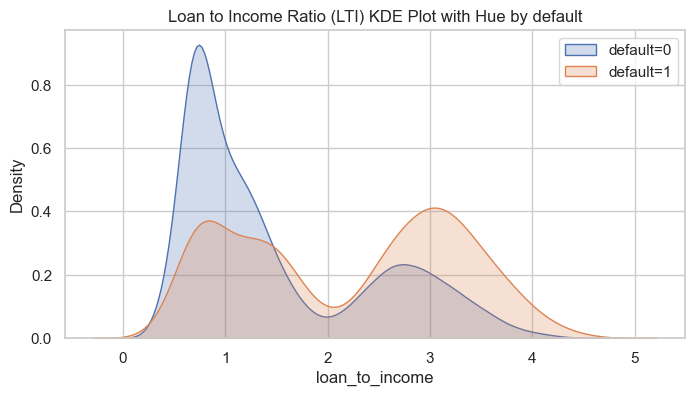

In [54]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

Insight on additional ratio metric:-
Blue graph has majority of its value on left hand side of LTI
Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

Delinquency ratio 

In [55]:
df_train_1[["delinquent_months","total_loan_months"]].head(3)

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83


In [56]:
df_train_1["delinquency_ratio"] = round(df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"],2)
df_train_1[["delinquency_ratio","delinquent_months","total_loan_months"]].head(3)
df_test_1["delinquency_ratio"] = round(df_test_1["delinquent_months"]*100/df_test_1["total_loan_months"],2)


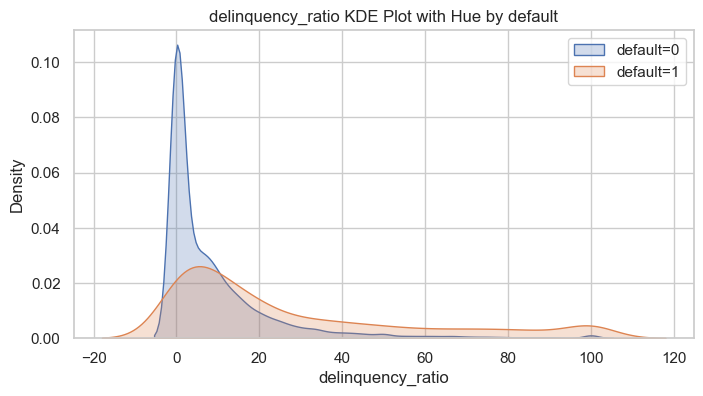

In [57]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"delinquency_ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

Blue graph has majority of value on left hand side.
Orange graph has many values when delinquency ratio is higher indicating some correlation on defaul

### Generate AVG DPD per delinquency 

In [58]:
df_train_1[["total_dpd","delinquent_months"]].head(3)

,total_dpd,delinquent_months
27434,33,6
13400,17,4
883,78,14


In [59]:
round(df_train_1["total_dpd"]/df_train_1["delinquent_months"],1).head(3)

27434   5.50
13400   4.20
883     5.60
dtype: float64

In [60]:
round(df_train_1["total_dpd"]/df_train_1["delinquent_months"],1)

27434   5.50
13400   4.20
883     5.60
7303     NaN
45124   4.70
        ... 
11284   5.50
44732    NaN
38158    NaN
860     4.80
15795   3.80
Length: 37487, dtype: float64

In [61]:
df_train_1["avg_dpd_per_delinquency"] =np.where(
                                    df_train_1["delinquent_months"] !=0,
                                    round(df_train_1["total_dpd"]/df_train_1["delinquent_months"],1),
                                    0
                                )
df_test_1["avg_dpd_per_delinquency"] =np.where(
                                    df_test_1["delinquent_months"] !=0,
                                    round(df_test_1["total_dpd"]/df_test_1["delinquent_months"],1),
                                    0
                                )

In [62]:
df_test_1.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,2,70,3,27,5,12,0,1.40,4.29,9.00
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,0,115,0,0,9,85,0,3.24,0.00,0.00
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,1,144,0,0,4,72,0,3.01,0.00,0.00


In [63]:
df_train_1.shape, df_test_1.shape

((37487, 36), (12498, 36))

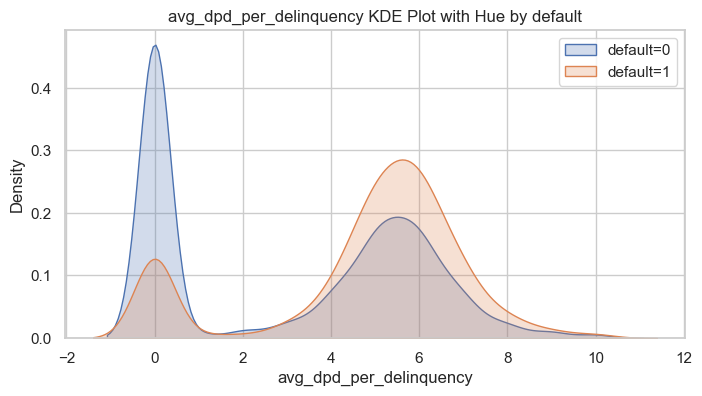

In [64]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"avg_dpd_per_delinquency KDE Plot with Hue by default")
plt.legend()
plt.show()

Insight: Graph clealy shows more occurances of default when avg_dpd_per_delinquency is high 

### Remove columns that are just unique ids and don't have influence on target

In [65]:
df_train_1.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,...,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,39.56,2636119.11,1.94,15.99,418763.45,4707707.29,4003661.08,80073.22,720658.99,3202928.87,...,1.00,75.99,4.89,26.94,5.00,43.33,0.09,1.55,10.39,3.29
std,9.85,2623816.51,1.54,8.94,168837.51,6289437.60,5401552.03,108031.04,972279.36,4321241.62,...,0.82,43.71,5.86,32.93,2.02,29.36,0.28,0.97,17.27,2.90
min,18.00,100000.00,0.00,1.00,110001.00,71000.00,50000.00,1000.00,9000.00,40000.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.30,0.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1136000.00,959500.00,19190.00,172710.00,767600.00,...,0.00,42.00,0.00,0.00,4.00,18.00,0.00,0.77,0.00,0.00
50%,40.00,1884000.00,2.00,16.00,400001.00,2652000.00,2235000.00,44700.00,402300.00,1788000.00,...,1.00,71.00,3.00,14.00,5.00,39.00,0.00,1.16,3.80,4.30
75%,46.00,3331500.00,3.00,24.00,560001.00,5159500.00,4598000.00,91960.00,827640.00,3678400.00,...,2.00,107.00,9.00,46.00,6.00,67.00,0.00,2.45,13.11,5.80
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47667000.00,953340.00,8580060.00,38133600.00,...,2.00,223.00,24.00,171.00,9.00,99.00,1.00,4.57,100.00,10.00


In [66]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [67]:
drop_columns=["cust_id", "loan_id", "disbursal_date","installment_start_dt"]
df_train_2 = df_train_1.drop(columns=drop_columns, axis="columns")
print(df_train_1.shape, df_train_2.shape)

(37487, 36) (37487, 32)


In [68]:
drop_columns=["cust_id", "loan_id", "disbursal_date","installment_start_dt", 
              "loan_amount", "income", "total_loan_months", "delinquent_months", "total_dpd"]
df_train_2 = df_train_1.drop(columns=drop_columns, axis="columns")
df_test_2 = df_test_1.drop(columns=drop_columns, axis="columns")
print("df_train_*",df_train_1.shape, df_train_2.shape)
print("df_test_*",df_test_1.shape, df_test_2.shape)


df_train_* (37487, 36) (37487, 27)
df_test_* (12498, 36) (12498, 27)


In [69]:
df_train_2.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [70]:
df_train_2.shape, df_train_2.shape

((37487, 27), (37487, 27))

In [71]:
X_train = df_train_2.drop("default", axis="columns")
y_train = df_train_2["default"]

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(["int64", "float64"]).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()



,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [72]:
X_test = df_test_2.drop('default', axis='columns')
y_test = df_test_2['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #features ; VLF

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [74]:
calculate_vif(X_train[cols_to_scale])

C:\Users\skgow\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [75]:
features_to_drop_vif = ["sanction_amount", "processing_fee", "gst", "net_disbursement", "principal_outstanding"]
X_train_1 = X_train.drop(features_to_drop_vif, axis="columns")
numeric_columns = X_train_1.select_dtypes(["int64","float64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [76]:
calculate_vif(X_train_1[numeric_columns])

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [77]:
df_train_2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [78]:
numeric_columns.append(pd.Index(["default"]))
df_train_2[numeric_columns.append(pd.Index(["default"]))].corr()

,age,number_of_dependants,years_at_current_address,zipcode,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,default
age,1.00,0.25,0.00,-0.00,0.00,0.03,-0.00,0.00,0.00,0.00,-0.17,0.00,0.01,-0.07
number_of_dependants,0.25,1.00,-0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,-0.04,0.00,0.01,-0.01
years_at_current_address,0.00,-0.01,1.00,0.01,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00
zipcode,-0.00,0.00,0.01,1.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.01
loan_tenure_months,0.00,0.00,-0.00,-0.01,1.00,0.00,0.01,-0.01,0.00,-0.00,0.63,-0.00,0.00,0.13
bank_balance_at_application,0.03,0.00,0.00,-0.01,0.00,1.00,-0.01,-0.00,-0.01,-0.00,-0.04,0.01,-0.00,-0.01
number_of_open_accounts,-0.00,0.01,0.00,-0.01,0.01,-0.01,1.00,-0.00,0.54,-0.01,0.00,-0.33,-0.00,-0.07
number_of_closed_accounts,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.00,1.00,0.00,0.00,-0.01,-0.00,0.00,0.00
enquiry_count,0.00,0.01,0.00,-0.01,0.00,-0.01,0.54,0.00,1.00,0.01,0.00,-0.18,-0.00,-0.00
credit_utilization_ratio,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,0.01,1.00,-0.01,0.00,0.00,0.40


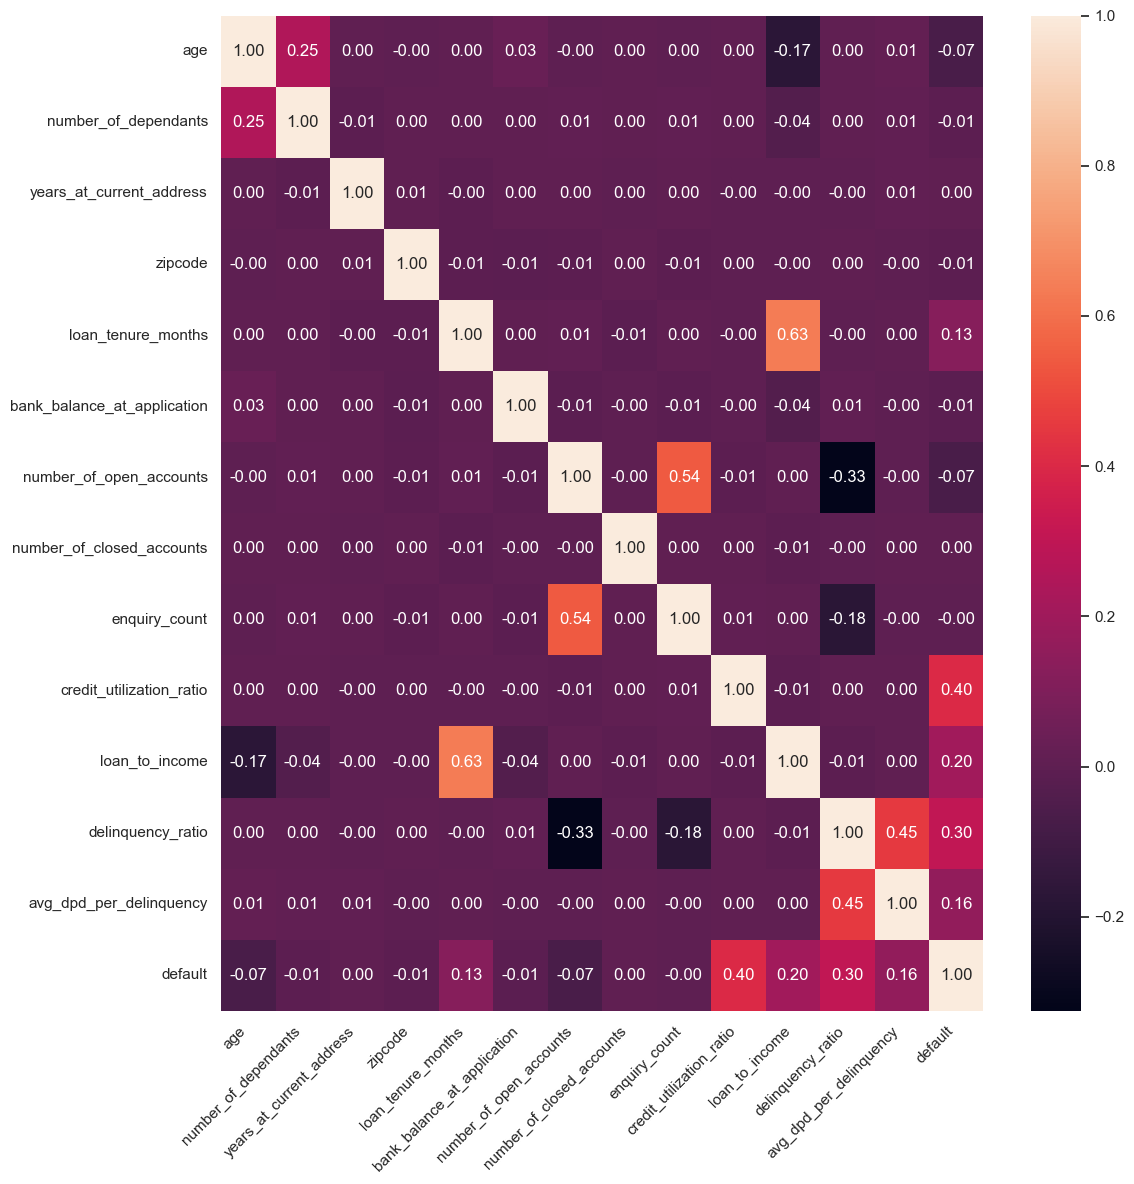

In [79]:
plt.figure(figsize=(12,12))
cm = df_train_2[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

(1) 
We can consider features that:
Are reasonably correlated with default (say, |corr| > 0.1 is worth considering).
Avoid multicollinearity — i.e., avoid using features that are strongly correlated with each other.


(2) 
✅ Top Correlated Features with default:
From your heatmap, the most positively correlated features with default are:

Feature	Correlation with default
credit_utilization_ratio	0.40 ✅
loan_to_income	0.20 ✅
avg_dpd_per_delinquency	0.16 ✅
loan_tenure_months	0.13 ✅
These are your best candidates for predicting default — they show moderate positive correlation.

(3) Features to Be Careful With (due to Multicollinearity):
Highly Correlated Pair	Corr
(a) loan_to_income & loan_tenure_months	--> 0.63
(b) number_of_open_accounts & enquiry_count	--> 0.54
(c) delinquency_ratio & avg_dpd_per_delinquency	--> 0.45
(d) delinquency_ratio & credit_utilization_ratio --> 0.30
These are quite correlated with each other — you might consider choosing only one from each pair if you're using models sensitive to multicollinearity (like Logistic Regression or Linear models).

(4) 
🧠 Recommendation: Pick these features (initial model)
✅ credit_utilization_ratio

✅ loan_to_income

✅ avg_dpd_per_delinquency

⚠️ loan_tenure_months (correlated with loan_to_income)

⚠️ enquiry_count or number_of_open_accounts (not both)

⚠️ delinquency_ratio (but avoid if using avg_dpd_per_delinquency)



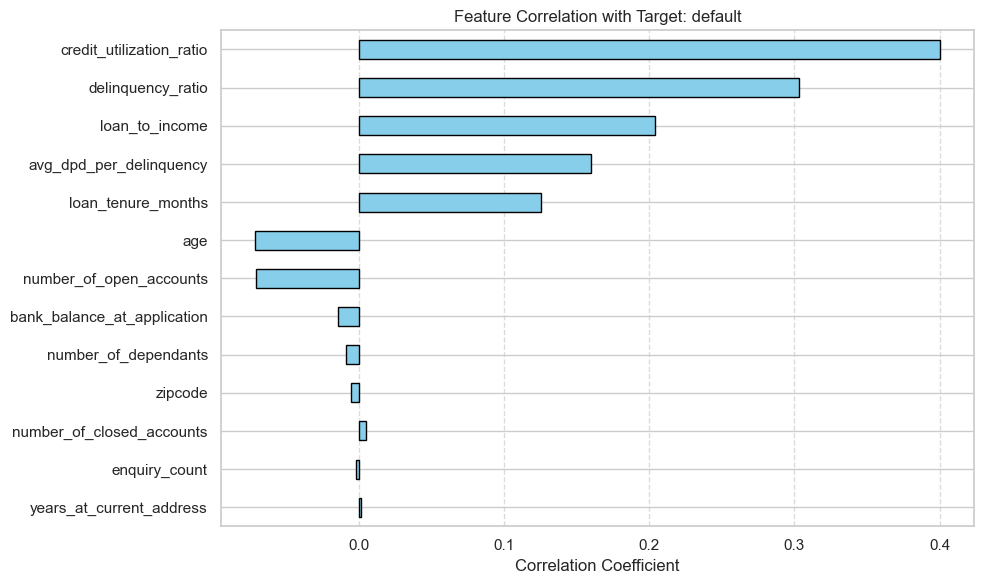

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Select just the correlation with the target
correlation_with_target = cm['default'].drop('default')  # drop the target itself

# Sort for better visualization
correlation_with_target = correlation_with_target.sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Correlation with Target: default')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()  # To have strongest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Feature selection : Categorical Columns

In [81]:
X_train_1.dtypes

age                            float64
gender                          object
marital_status                  object
employment_status               object
number_of_dependants           float64
residence_type                  object
years_at_current_address       float64
city                            object
state                           object
zipcode                        float64
loan_purpose                    object
loan_type                       object
loan_tenure_months             float64
bank_balance_at_application    float64
number_of_open_accounts        float64
number_of_closed_accounts      float64
enquiry_count                  float64
credit_utilization_ratio       float64
loan_to_income                 float64
delinquency_ratio              float64
avg_dpd_per_delinquency        float64
dtype: object

### Calculate WOE and IV

In [82]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [83]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  float64
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  loan_tenure_months           37487 non-null  float64
 13  bank_balance_at_a

In [84]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  float64
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  loan_tenure_months           37487 non-null  float64
 13  bank_balance_at_a

In [85]:
X_binned = pd.cut(X_train_1["age"], bins=10, labels=False)
X_binned.unique

<bound method Series.unique of 27434    5
13400    2
883      6
7303     4
45124    2
        ..
11284    2
44732    2
38158    3
860      4
15795    3
Name: age, Length: 37487, dtype: int64>

In [86]:
X_train_1["age"].count()

np.int64(37487)

In [87]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [88]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [89]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature encoding

In [90]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [91]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True


In [92]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False
199,0.192,0.623,1.000,0.727,0.635,0.000,0.000,True,False,False,True,False,False


In [93]:
X_train_encoded.shape, X_test_encoded.shape

((37487, 13), (12498, 13))

In [94]:
X_train_encoded.info(), X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       37487 non-null  float64
 1   loan_tenure_months        37487 non-null  float64
 2   number_of_open_accounts   37487 non-null  float64
 3   credit_utilization_ratio  37487 non-null  float64
 4   loan_to_income            37487 non-null  float64
 5   delinquency_ratio         37487 non-null  float64
 6   avg_dpd_per_delinquency   37487 non-null  float64
 7   residence_type_Owned      37487 non-null  bool   
 8   residence_type_Rented     37487 non-null  bool   
 9   loan_purpose_Education    37487 non-null  bool   
 10  loan_purpose_Home         37487 non-null  bool   
 11  loan_purpose_Personal     37487 non-null  bool   
 12  loan_type_Unsecured       37487 non-null  bool   
dtypes: bool(6), float64(7)
memory usage: 2.5 MB
<class 'pandas.cor

(None, None)

### Attempt-1

1. Logistic Regression, RandomForest & XGB
2. No handling of class imbalance

In [95]:
from sklearn.linear_model import LogisticRegression # classification, Log, Probability bet. 0 and 1
from sklearn.ensemble import RandomForestClassifier #RandomForest - Decision Tree style
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting ; for Regression
from sklearn.model_selection import train_test_split # Supervised Train-Test

from sklearn.metrics import accuracy_score        # for classification
from sklearn.metrics import classification_report # for classification
from sklearn.metrics import confusion_matrix      # for classification


In [96]:
X=X_train_encoded
y=y_train
print(X.shape, y.name)
model_lr = LogisticRegression()
model_lr.fit(X,y)
y_pred = model_lr.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

(37487, 13) default
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [97]:
model_lr.coef_[0]

array([-0.50706484,  0.57245323,  0.61387589, 12.7128837 , 10.58496298,
        9.38638886,  2.01055632, -1.46734721,  1.54105605,  1.00244684,
       -1.25817613,  0.67507967,  0.67507967])

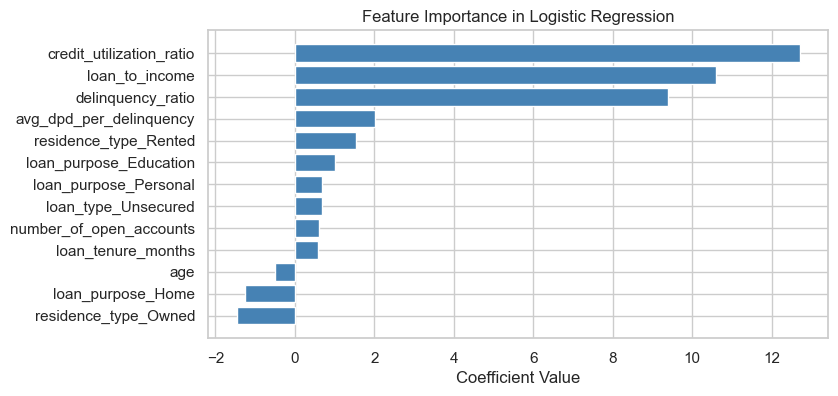

In [98]:
feature_importance = model_lr.coef_[0]
coef_df = pd.DataFrame(data=feature_importance, index=X_test_encoded.columns, columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients", ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [100]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.73      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### Keep it for initial reference ; RandomizedSearch: Logistic Regression

In [101]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7631157553511313
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [102]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.792186823884376
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.77      0.82      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt-1 ; BayesianOptimization for Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer, classification_report
from bayes_opt import BayesianOptimization
import numpy as np

# Mapping integers to solver strings
solver_map = {
    0: 'lbfgs',
    1: 'saga',
    2: 'liblinear',
    3: 'newton-cg'
}

# Define the objective function for BO
def log_reg_cv(C, solver_idx):
    C = float(C)
    solver_idx = int(solver_idx)
    solver = solver_map[solver_idx]

    try:
        model = LogisticRegression(
            C=C,
            solver=solver,
            max_iter=10000,
            random_state=42
        )

        score = cross_val_score(
            model,
            X_train_encoded,
            y_train,
            cv=3,
            scoring=make_scorer(f1_score, average='binary')
        ).mean()

        return score
    except Exception as e:
        return 0  # Incompatible solver/params — assign poor score

# Define the parameter bounds
pbounds = {
    'C': (1e-4, 1e4),
    'solver_idx': (0, 3)  # Will be mapped to 0, 1, 2, 3
}

# Initialize optimizer
optimizer = BayesianOptimization(
    f=log_reg_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Run optimization
optimizer.maximize(
    init_points=10,
    n_iter=40
)

# Extract best parameters
best_params = optimizer.max['params']
best_params['C'] = float(best_params['C'])
best_params['solver'] = solver_map[int(best_params['solver_idx'])]

print(f"Best Parameters: {best_params}")

# Train final model
best_model = LogisticRegression(
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=10000,
    random_state=42
)
best_model.fit(X_train_encoded, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


|   iter    |  target   |     C     | solver... |
-------------------------------------------------
| 1         | 0.7625    | 3.745e+03 | 2.852     |
| 2         | 0.7626    | 7.32e+03  | 1.796     |
| 3         | 0.7626    | 1.56e+03  | 0.468     |
| 4         | 0.7625    | 580.8     | 2.599     |
| 5         | 0.7625    | 6.011e+03 | 2.124     |
| 6         | 0.7623    | 205.8     | 2.91      |
| 7         | 0.7627    | 8.324e+03 | 0.637     |
| 8         | 0.7629    | 1.818e+03 | 0.5502    |
| 9         | 0.7624    | 3.042e+03 | 1.574     |
| 10        | 0.7627    | 4.319e+03 | 0.8737    |
| 11        | 0.7625    | 1.907e+03 | 1.658     |
| 12        | 0.7625    | 1.819e+03 | 2.206     |
| 13        | 0.7625    | 1.014e+03 | 1.565     |
| 14        | 0.7624    | 56.44     | 1.391     |
| 15        | 0.7626    | 6.675e+03 | 1.927     |
| 16        | 0.7626    | 7.32e+03  | 1.72      |
| 17        | 0.7625    | 1.817e+03 | 1.479     |
| 18        | 0.7627    | 4.32e+03  | 0.7913    |


### Attempt- 2; BayesianOptimization for XGB

In [104]:
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define the objective function
def xgb_cv(n_estimators, max_depth, learning_rate, subsample,
           colsample_bytree, scale_pos_weight, reg_alpha, reg_lambda):

    # Convert float hyperparameters to int where necessary
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    # Build the model
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=scale_pos_weight,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42,
        # use_label_encoder=False,
        eval_metric='logloss'
    )

    # Perform 3-fold cross-validation and return the mean F1 score
    scores = cross_val_score(model, X_train_encoded, y_train, cv=3,
                             scoring=make_scorer(f1_score, average='binary'))
    return scores.mean()

# Define the bounds for each hyperparameter
param_bounds = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'scale_pos_weight': (1, 10),
    'reg_alpha': (0.01, 10.0),
    'reg_lambda': (0.01, 10.0)
}

# Initialize the optimizer
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Run optimization
optimizer.maximize(
    init_points=10,
    n_iter=40
)

# Get best parameters
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

print(f"Best Parameters: {best_params}")

# Train the best model on the full training set
best_model = XGBClassifier(
    **best_params,
    random_state=42,
    # use_label_encoder=False,
    eval_metric='logloss'
)
best_model.fit(X_train_encoded, y_train)

# Evaluate on test set
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.7668    | 0.7498    | 0.2857    | 8.124     | 219.7     | 1.569     | 1.568     | 1.523     | 0.9465    |
| 2         | 0.7901    | 0.8404    | 0.2153    | 3.144     | 294.0     | 8.326     | 2.131     | 2.636     | 0.6734    |
| 3         | 0.7776    | 0.7217    | 0.1622    | 6.024     | 158.2     | 6.122     | 1.404     | 3.629     | 0.7465    |
| 4         | 0.768     | 0.7824    | 0.2377    | 4.398     | 202.8     | 5.928     | 0.474     | 6.468     | 0.6682    |
| 5         | 0.7699    | 0.626     | 0.2852    | 9.759     | 261.7     | 3.053     | 0.9857    | 7.158     | 0.7761    |
| 6         | 0.7782    | 0.6488    | 0.1536    | 3.241     | 281.9     | 2.595     | 6.629     | 3.805     | 0.808     |
| 7         | 0.7652    

### Using shap

#### shap is a Python library used for AI explainibility. Use TreeExplainer from this library to explain the best performing XGBoost model that you got in the Attempt 2.

#### Use shap.TreeExplainer to explain the model

In [112]:
import shap

# Create the explainer
explainer = shap.TreeExplainer(best_model)

# Get SHAP values for test data
shap_values = explainer.shap_values(X_test_encoded)


#### Visualize the explanations

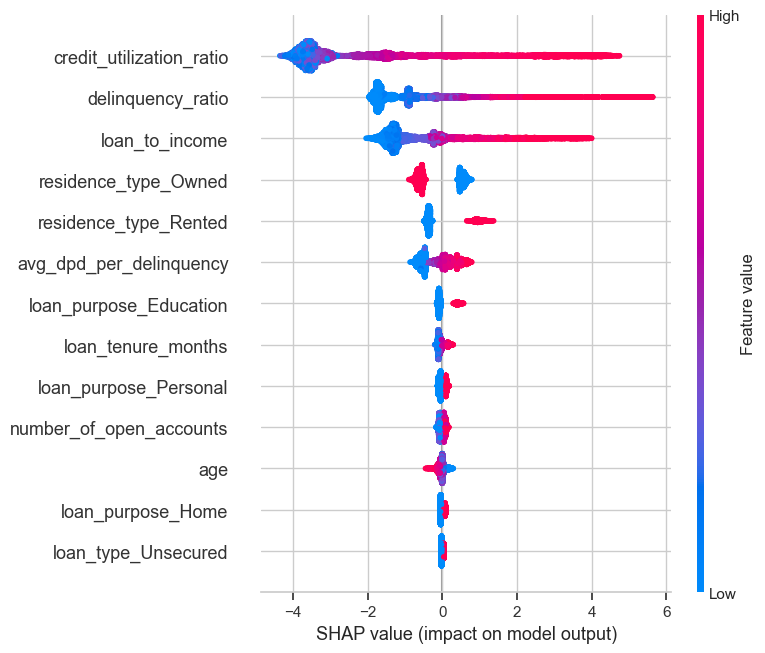

In [115]:
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_encoded, show=False)
plt.savefig('summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

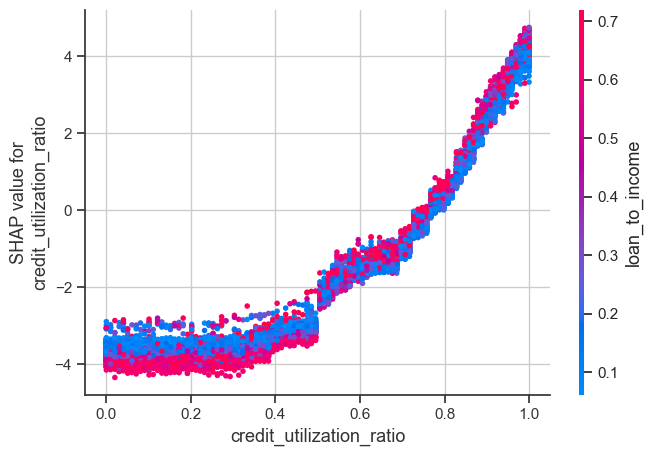

In [123]:
shap.dependence_plot("credit_utilization_ratio", shap_values, X_test_encoded, show=False)
plt.savefig('credit_utilization_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

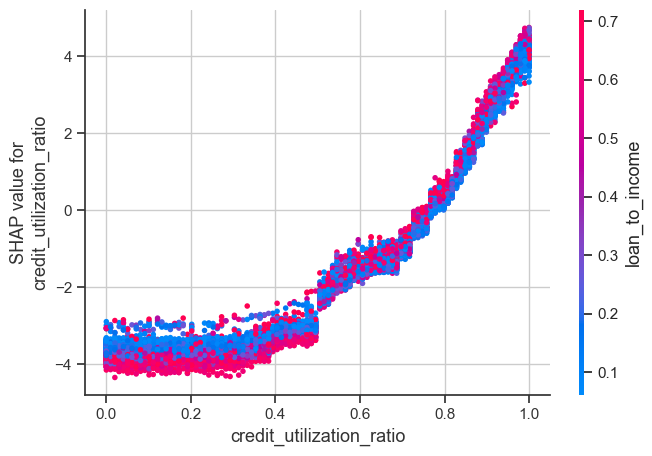

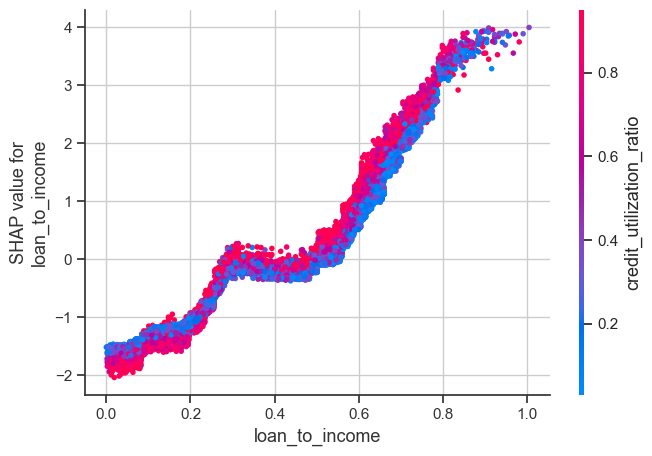

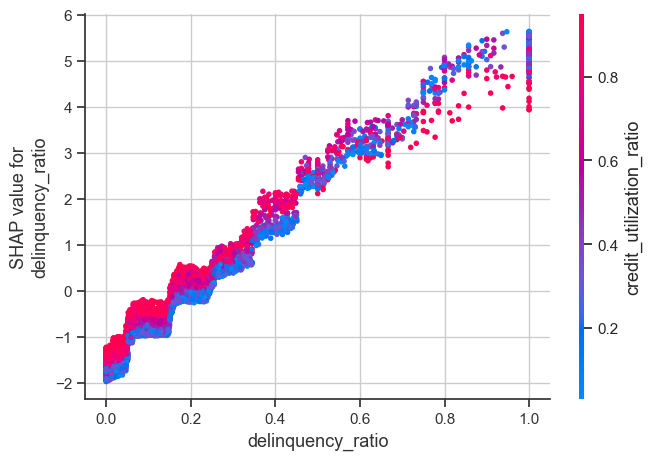

In [122]:
shap.dependence_plot("credit_utilization_ratio", shap_values, X_test_encoded)
shap.dependence_plot("loan_to_income", shap_values, X_test_encoded)
shap.dependence_plot("delinquency_ratio", shap_values, X_test_encoded)

In [124]:
import shap
import matplotlib.pyplot as plt

# Get the expected value (base value of the model)
expected_value = explainer.expected_value

# Select the first instance
instance = X_test_encoded.iloc[0]

# Generate the force plot (for tree-based models, shap_values will be a 2D array)
shap.initjs()  # Enables JS visualizations in Jupyter Notebook

# Plot
shap.force_plot(expected_value, shap_values[0], instance)


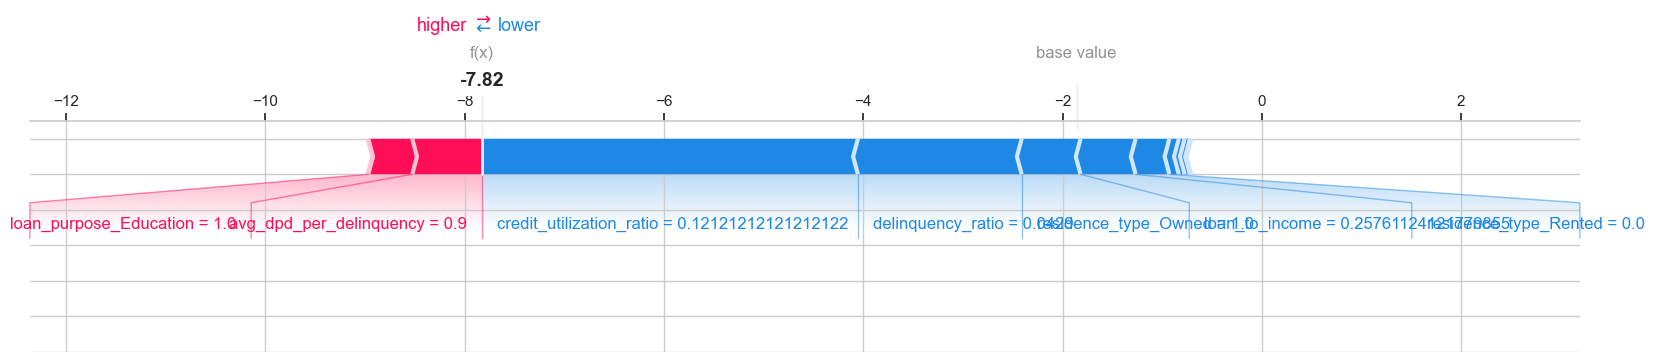

<Figure size 640x480 with 0 Axes>

In [125]:
import shap
import matplotlib.pyplot as plt

# Save the force plot using matplotlib
fig = shap.force_plot(expected_value, shap_values[0], instance, matplotlib=True)
plt.savefig('force_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
